<h2><font color='#a762bc'>An Analysis of Palmer Penguins</font></h2>
<h6><b>Author: Mark Gallagher</b></h6>

***

#### <font color='#047374'>Table of contents<font><a class='anchor' id='top'></a>
- [Section 1: Introduction](#section1)
- [Section 2: Import Libraries](#section2)
- [Section 3: Load the Data](#section3)
- [Section 4: Inspect the Data](#section4)

    - [Section 4.1: Inspect the Data](#section41)
    
    - [Section 4.2: Inspect the Data](#section42)
    
- [Section 5: Data Visualisation (Histogram)](#section5)
- [Section 6: Data Visualisation (Body Mass)](#section6)
- [Section 7: Summary](#section7)


***

#### <b>Section 1: Introduction</b><a class="anchor" id="section1"></a>

This notebook contains my analysis of the famous Palmer Penguins dataset.

<img src="https://r.qcbs.ca/workshop03/book-en/images/palmerpenguins.png" width=100>

<sub>Figure 1.1: Artwork by [Allison Horst](https://twitter.com/allison_horst).</sub> 

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/) and contains size measurements for three species of penguins, that were observed across three islands in the Palmer Archipelago, Antartica.

The data was collected by [Dr. Kristen Gorman](https://gormankb.github.io/) between 2007-2009 with the Palmer Station Long Term Ecological Research Program [LTER](https://pallter.marine.rutgers.edu/).


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=450>

<sub>Figure 1.2: Artwork by [Allison Horst](https://twitter.com/allison_horst)</sub> 

***

#### <b>Section 2: Import Libraries</b><a class="anchor" id="section2"></a>

The first step is importing the necessary libraries. For this project, I will be using the following:

<ol>
<li><b>pandas:</b> data manipulation library in Python, providing data structures and functions needed to manipulate and analyse structured data</li>
<li><b>numpy:</b> for numerical computing in Python</li>
<li><b>matplotlib:</b> a plotting library for Python for creating plots and visualisations.</li>
</ol>

These libraries will allow me to thoroughly investigate the data (and associated csv files) amongst other features.

In [76]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### source: [Creating Histograms using Pandas](https://mode.com/example-gallery/python_histogram)

***

#### <b>Section 3: Load the Data</b><a class="anchor" id="section3"></a>

Importing data is the first step in any data science project. Let's load the palmerpenguin data, and validate it by viewing the first 5 rows.

In [77]:
# Read the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# View the first 5 rows
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


###### source: [pandas read csv() Tutorial: Importing Data](https://www.datacamp.com/tutorial/pandas-read-csv)

***

#### <b>Section 4: Inspect the Data</b><a class="anchor" id="section4"></a>

##### <i>4.1. Data Summary</i>

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##### <i>4.2. Count Values</i>

In [79]:
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

This count allows us to quickly check if there's 'null' or missing values associated to any of the penguins attributes.

##### <i>4.3. Selecting First Row</i>

In [80]:
# We can now look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

##### <i>4.4. Sex</i>

In [81]:
# Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

##### <i>4.5. Descriptive Statistics</i>

In [82]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##### <i>4.6. Counting Unique Values</i>

Now we will inspect the values in each of the columns, and get a count

In [83]:
for val in df:
    print(df[val].value_counts())
    print()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

bill_length_mm
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: count, Length: 164, dtype: int64

bill_depth_mm
17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: count, Length: 80, dtype: int64

flipper_length_mm
190.0    22
195.0    17
187.0    16
193.0    15
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
216.0     8
212.0     7
186.0     7
181.0     7
189.0     7
230.0     7
192.0     7
184.0     7
199.0     6
213.0     6
188.0     6
214.0     6
217.0     6
222.0     6
201.0     6
219.0     5
209.0     5
218.0     5
221.0     5
203.0     5
194.0     5
180.0     5
178.0     4
225.0     4
228.0     4
202.0     4
200.

***

#### <b>4. Sorting Data</b>

We can sort the source data by specific variables to make it easy to read and scan.

In [84]:
# Sort by 'Island' (display first 5 rows)
df.sort_values("island").head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
108,Adelie,Biscoe,38.1,17.0,181.0,3175.0,FEMALE
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,MALE
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,FEMALE
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,MALE


#### <b>5. Summary Statistics</b>

IMPORTANT! Need to come back to this as it's returning an error

***

#### <b>6. Subset Variables</b>

Selecting a subset of the 'Palmer Penguin' dataset.

In [85]:
island_sex = df[["island", "sex"]]

In [86]:
island_sex

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
3,Torgersen,NaN
4,Torgersen,FEMALE
...,...,...
339,Biscoe,NaN
340,Biscoe,FEMALE
341,Biscoe,MALE
342,Biscoe,FEMALE


***

#### <b>Section 5: Data Visualisation (Histogram)</b><a class="anchor" id="section5"></a>

The histogram plot shows the distribution of the data. You can use the histogram plot to see the distribution of one or more variables. 

##### <b>5.1. Body Mass</b>

<function matplotlib.pyplot.show(close=None, block=None)>

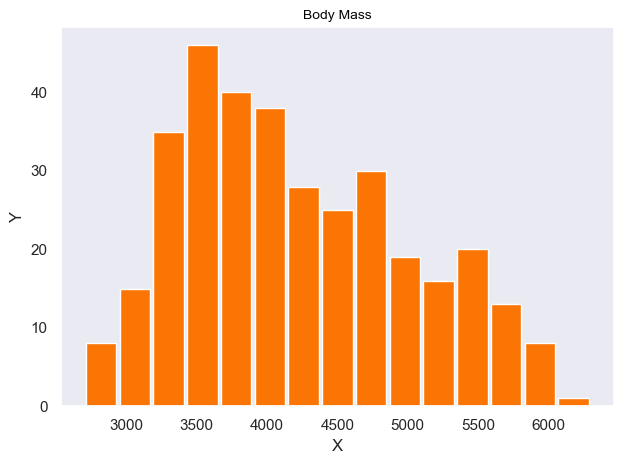

In [87]:
df.hist(column='body_mass_g', bins=15, color='#fb7504', rwidth=0.9, grid=False, )
plt.title("Body Mass", size=10, color="#060505")
plt.xlabel('X')
plt.ylabel('Y') 
plt.tight_layout()
plt.show

###### source: [Creating Histograms using Pandas](https://mode.com/example-gallery/python_histogram)

##### <b>5.2. Flipper Length</b>

<function matplotlib.pyplot.show(close=None, block=None)>

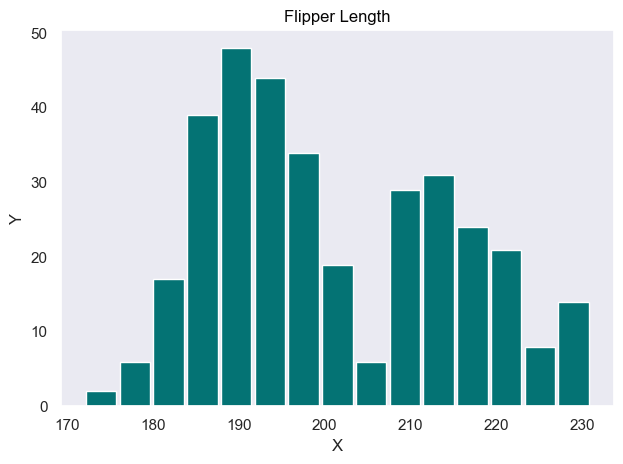

In [88]:
df.hist(column='flipper_length_mm', bins=15, color='#047374', rwidth=0.9, grid=False)
plt.title("Flipper Length", size=12, color="#060505")
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout() # Adjust the padding between and around subplots
plt.show

###### source: [Creating Histograms using Pandas](https://mode.com/example-gallery/python_histogram)

***

#### <b>Section 5: Data Visualisation (Species of Penguins)</b><a class="anchor" id="section6"></a>

In [89]:
# Step 1: Count Penguin Species
species_counts = df['species'].value_counts()

In [90]:
# Step 2:  Define the Bar Colours
colors = ['#fb7504', '#047374', '#c65ccc']

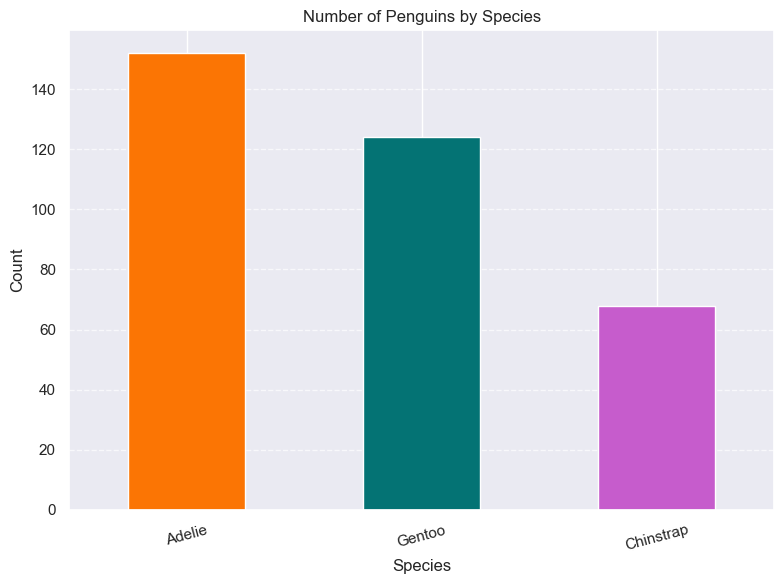

In [91]:
# Step 2: Plotting the Bar Chart
plt.figure(figsize=(8, 6)) # Create a new figure with a specified size
species_counts.plot(kind='bar', color=colors)
plt.title('Number of Penguins by Species') # Set the title of the chart
plt.xlabel('Species') # Label for the x-axis
plt.ylabel('Count') # Label for the y-axis
plt.xticks(rotation=15) # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines to the y-axis
plt.tight_layout() # Adjust the padding between and around subplots
plt.show() # Display the plot

###### source: [Lorem ipsum](https://mode.com/example-gallery/python_histogram)

***

#### <b>Section 7: Flipper length vs. Bill length (Two Variable Plot)</b><a class="anchor" id="section7"></a>

In [92]:
# Get just the flipper length

flen = df['flipper_length_mm'] # Create a new variable for flipper length

# Show the Dats
print(flen) # Display (print) the data

# Show the Type
print(type(flen)) # Display the data type

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64
<class 'pandas.core.series.Series'>


In [93]:
# Get just the flipper length

blen = df['bill_length_mm'].to_numpy() # Create variable for flipper length and

# Show the data
blen

array([39.1, 39.5, 40.3,  nan, 36.7, 39.3, 38.9, 39.2, 34.1, 42. , 37.8,
       37.8, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46. , 37.8, 37.7,
       35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5,
       40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36. , 44.1,
       37. , 39.6, 41.1, 37.5, 36. , 42.3, 39.6, 40.1, 35. , 42. , 34.5,
       41.4, 39. , 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6,
       35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9,
       37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9,
       38.3, 38.9, 35.7, 41.1, 34. , 39.6, 36.2, 40.8, 38.1, 40.3, 33.1,
       43.2, 35. , 41. , 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2,
       38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2,
       37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39. , 44.1, 38.5, 43.1,
       36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37. , 39.7, 40.2, 40.6, 32.1,
       40.7, 37.3, 39. , 39.2, 36.6, 36. , 37.8, 36

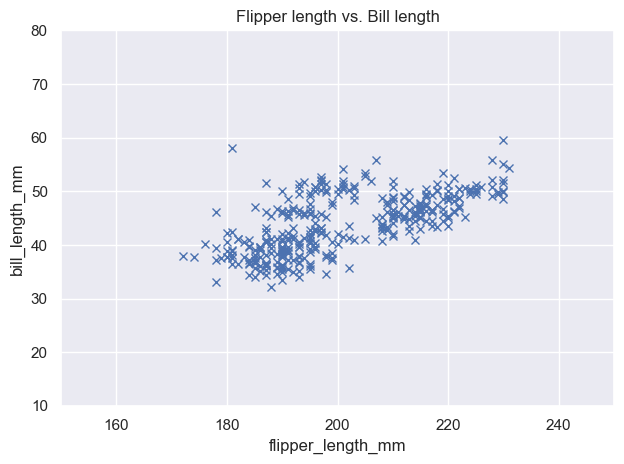

In [96]:
# Simple Plot

plt.plot(flen, blen, 'x')

# Add Axis Labels

plt.xlabel('flipper_length_mm')
plt.ylabel('bill_length_mm')

# Add a Title
plt.title('Flipper length vs. Bill length')

# Set the X Limits
plt.xlim(150, 250) # Adjusting limits for optimal plot view

# Set the Y Limits
plt.ylim(10, 80) # Adjusting limits for optimal plot view

plt.tight_layout() # Adjust the padding between and around subplots

#### <b>Section 7.1: Add a Best Fit Line (Flipper Length vs. Bill Length)</b><a class="anchor" id="section7"></a>

###### source: [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

$ y = mx + c = p_1 x^1 + p_0 = p1 x + p_0$

In [98]:
# Fit a straight line between x and y
m, c = np.polyfit(flen, blen, 1)

# Show m and c
m, c

# Simple Plot

# Create a new figure and set of axis
fig, ax = plt.subplots()

# Simple Plot
ax.plot(flen, blen, 'x')

# Simple Plot
ax.plot(flen, m * flen + c, 'r-')

# Add Axis labels
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('bill_length_mm')

# Title
ax.set_title('Flipper length vs. Bill length')

# Set X Limits
ax.set_xlim(150, 250)

# Set Y Limits
ax.set_ylim(10, 80)

 ** On entry to DLASCLS parameter number  4 had an illegal value
 ** On entry to DLASCLS parameter number  4 had an illegal value
 ** On entry to DLASCLS parameter number  4 had an illegal value
 ** On entry to DLASCLS parameter number  4 had an illegal value
 ** On entry to DLASCLS parameter number  5 had an illegal value
 ** On entry to DLASCLS parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

***

#### <b>Section 7: Penguin Mass vs. Flipper Length (Two Variable Plot)</b><a class="anchor" id="section7"></a>

In [ ]:
# Get the Penguin (Body) Mass

pmass = df['body_mass_g']

# Show the Data
print(pmass)

# Show the Data Type
print(type(pmass))

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64
<class 'pandas.core.series.Series'>


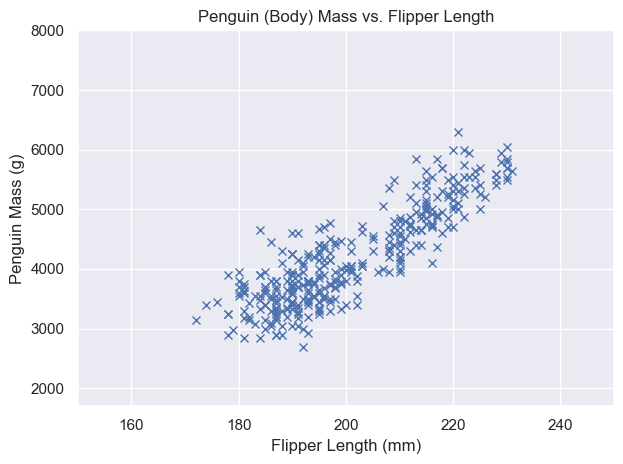

In [ ]:
# Simple Plot

plt.plot(flen, pmass, 'x')

# Add Axis labels
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Penguin Mass (g)')

# Title
plt.title('Penguin (Body) Mass vs. Flipper Length')

# Set X Limits
plt.xlim(150, 250)

# Set Y Limits
plt.ylim(1700, 8000)

plt.tight_layout() # Adjust the padding between and around subplots

***

#### <b>Section 7: Data Visualisation (Scatter)</b><a class="anchor" id="section7"></a>

##### <i>7.1. Scatterplot Matrix</i>

In [ ]:
import seaborn as sns

/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


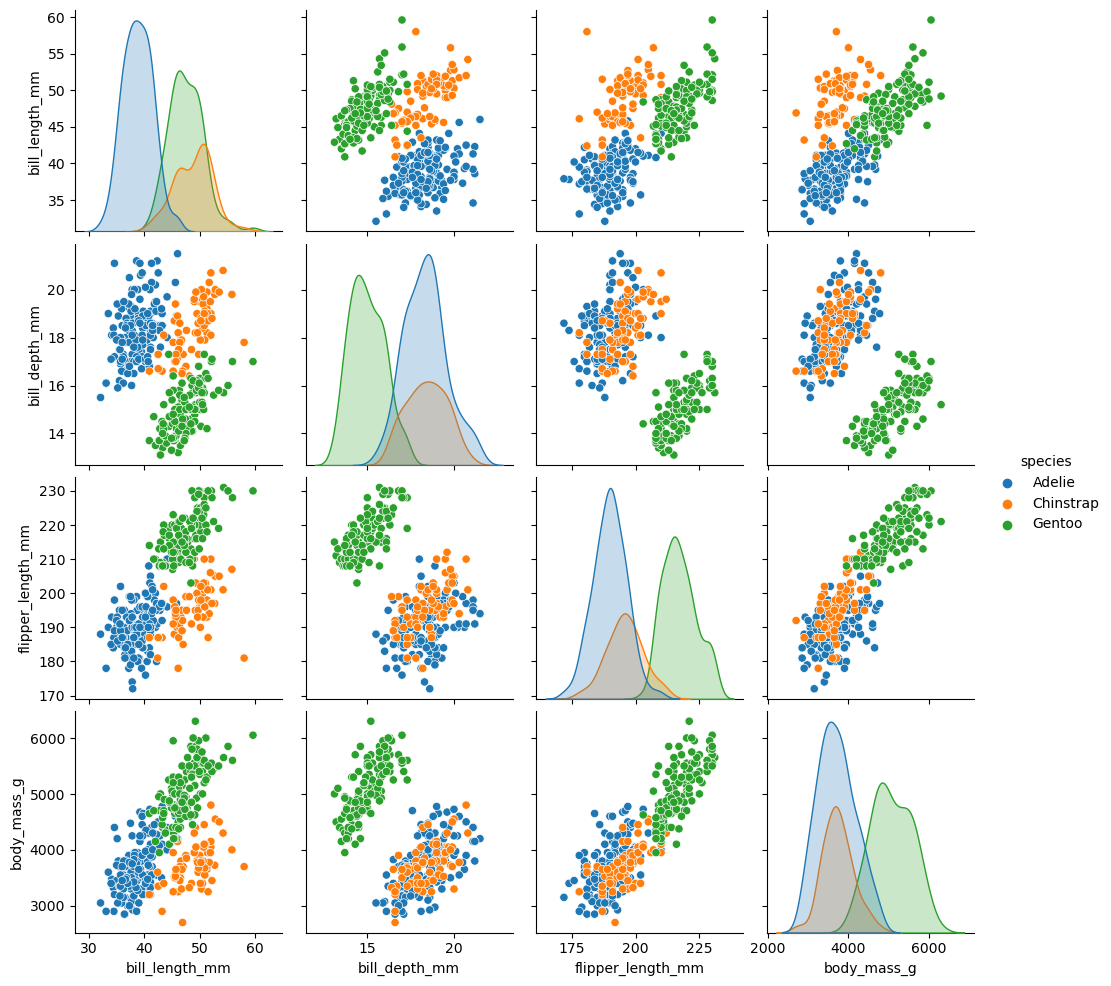

In [ ]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

###### <b>source: [Seaborn: Installing and getting started](https://seaborn.pydata.org/installing.html) </b>

##### <i>7.2. Linear Regression</i>

In [ ]:
import seaborn as sns
sns.set_theme()

In [ ]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


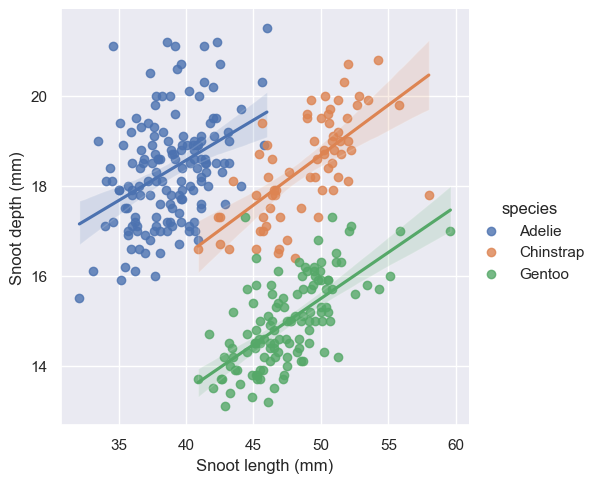

In [ ]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

***

### End
